# Linear Regression Model and Analysis

I will conduct linear regression using statsmodels, and use pure python for confidence interval and prediction interval. Statsmodels follows largely the traditional model where we want to know how well a given model fits the data, and what variables "explain" or affect the outcome, or what the size of the effect is. In general, statsmodels is made for rigorous statistics.

Steps of making Linear Regression Analysis:
1. Import dataset
2. Take sample from dataset.
3. Use pandas library to get descriptive statistics (mean. standard deviation, percentile)
4. Use pandas library to get correlation between each variable in the dataset
5. Set independent variable, x and dependent variable , y based on high correlation variables
6. Make boxplot for dependent and independent variable to check for outliers
7. Make scatterplot to see the trend between variables
8. Use statsmodels library to get linear regression model

Because the sample size is small, i will skip step 1 and 4. 

In [5]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import statsmodels.api as sm
%matplotlib inline

In [13]:
# create dataset and assign x and y
# we create an artificial data of bills(independent variable) and tips given(dependent variable)

x = [34, 108, 64, 88, 99 ,51] 
y = [5, 17, 11, 8, 14, 5]
df = pd.DataFrame({"bills" : x, "tips" : y})
x = df.bills
y = df.tips
df

,bills,tips
0,34,5
1,108,17
2,64,11
3,88,8
4,99,14
5,51,5


<Axes: >

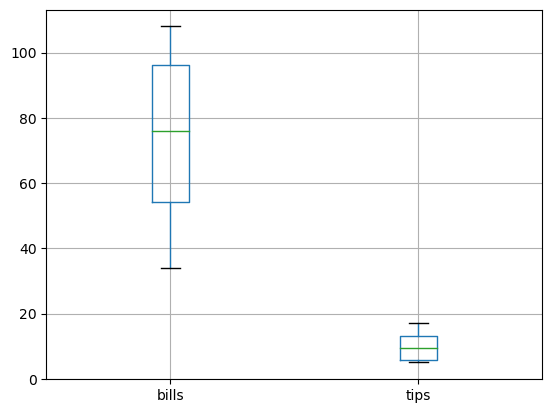

In [14]:
# use boxplot to see the distribution of dataset and identify outliers
# there are'nt any outliers in the data

df.boxplot()

In [15]:
# check out the descriptive statistic
# we get the data set mean, median(50% percentile), and standard deviation 

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bills,6.0,74.0,29.003448,34.0,54.25,76.0,96.25,108.0
tips,6.0,10.0,4.898979,5.0,5.75,9.5,13.25,17.0


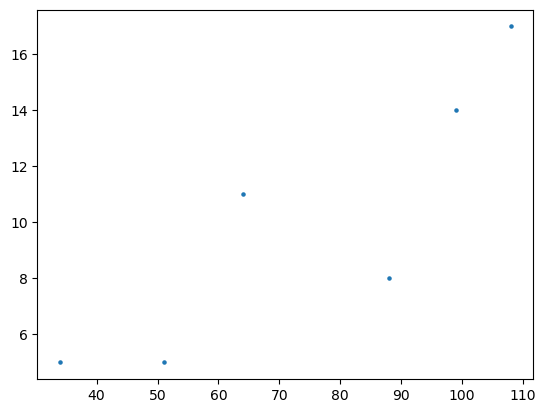

In [16]:
# see the trend using scatter plot
# we can notice upward trend between independent variable and dependent variable

plt.scatter(x, y, s  = 5 )

In [17]:
# add constant and use OLS fit model
# we have to add constant to X to fit into statsmodels.OLS

X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   tips   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     11.96
Date:                Thu, 07 Sep 2023   Prob (F-statistic):             0.0259
Time:                        15:40:09   Log-Likelihood:                -13.349
No. Observations:                   6   AIC:                             30.70
Df Residuals:                       4   BIC:                             30.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8203      3.323     -0.247      0.8

C:\Users\Zikri\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [28]:
# r squared 
# prediction 
# coefficient
print('our model accuracy (r_squared value) is' ,round(model.rsquared,4))
print("===============+")
print('the predicted value of dependent variable is' ,model.predict())
print("================")
print( model.params)

our model accuracy (r_squared value) is 0.7494
===============+
the predicted value of dependent variable is [ 4.15121255 14.97146933  8.53780314 12.04707561 13.65549215  6.63694722]
const   -0.820257
bills    0.146220
dtype: float64


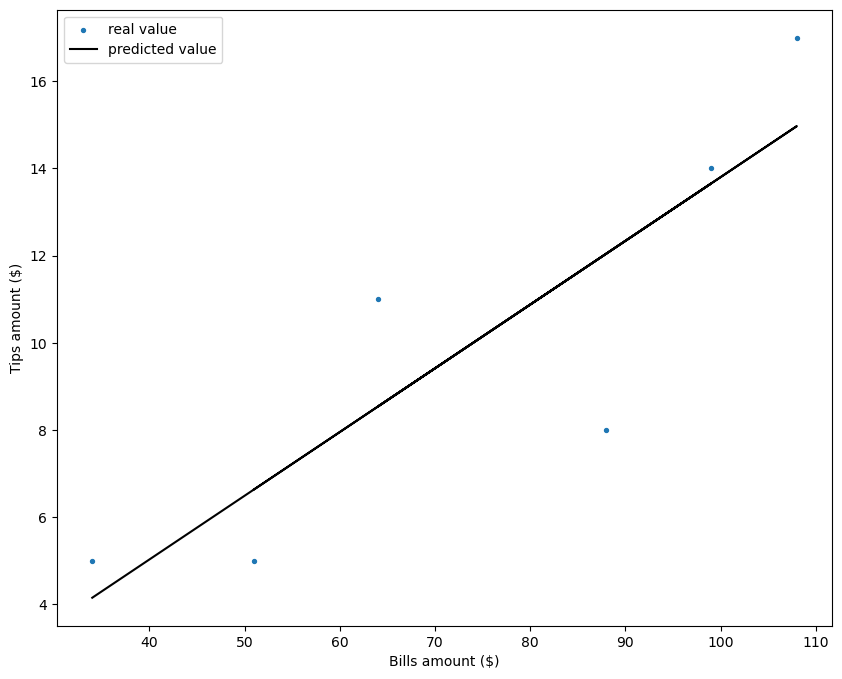

In [29]:
# plot linear regression

plt.figure(figsize = (10,8))
plt.scatter(x,y, s = 8, label = "real value")
plt.plot(x,model.predict(),color = "black", label = "predicted value")
plt.xlabel("Bills amount ($)")
plt.ylabel("Tips amount ($)")
plt.legend()

## Confidence interval band 

We must remember that Regression Model is based on estimate, and it is an 'estimators'. Regression is not deterministic. We cannot say that it will fall into regression line 100% of times. It is not actually that simple in real data. 

Confidence interval is for the mean of dependent variable value, not individual value.

ŷ: the predicted value of y (point estimator)\
t: the value of t statistic based on sample size (significance level used is alpha = 0.05)\
se: estimated standard deviation of ŷ\
s_xy: standard estimation of error (standard error of the model)

The 95% confidence interval is commonly interpreted as there is a 95% probability that the true linear regression line of the population will lie within the confidence interval of the regression line calculated from the sample data.

The 95% confidence interval for the forecasted values ŷ of x is as below:


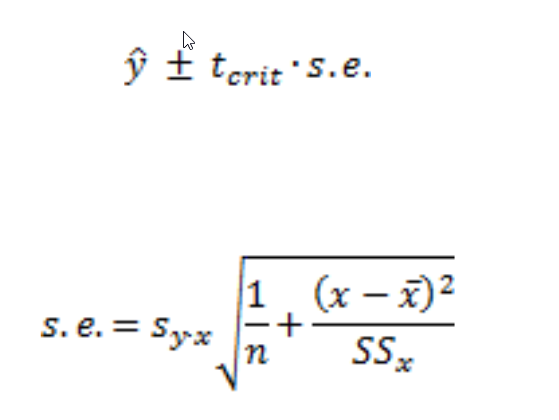

## Prediction Interval Band

The prediction interval is for an individual value, where confidence interval is about the mean value. In general, the prediction interval will always be bigger than confidence interval. 

x0: specific value of independent variable\
ŷ0: the predicted value of y (point estimator)\
t: the value of t statistic based on sample size (significance level used is alpha = 0.05)]\
se: estimated standard deviation of ŷ\
s_xy: standard estimation of error (standard error of the model)\

There is a concept called a prediction interval. Here we look at any specific value of x, x0, and find an interval around the predicted value ŷ0 for x0 such that there is a 95% probability that the real value of y (in the population) corresponding to x0 is within this interval

In short, prediction interval is the interval for individual value, that we are 95% confidence that individual value will fall into prediction interval band according to our linear regression model.

The 95% prediction interval of the forecasted value ŷ0 for x0 is as below:

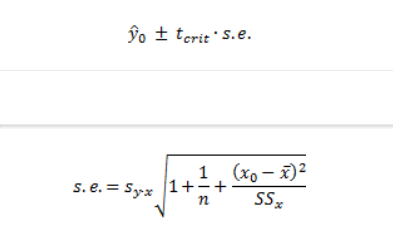

In [164]:
# get t-value for the data set sample size
import scipy.stats
t_value = scipy.stats.t.ppf(q = 1 - 0.05/2, df =( len(x)-2))
t_value

2.7764451051977987

In [165]:
# Root Mean Square Error = Standard Error of our linear regression model
s = model.scale ** 0.5
s

2.7420290393240614

In [273]:
# Estimated standard deviation of y* ==> sy
x_ = np.linspace(0,200,100)

square = 0 
for i in x: 
        square = square + (i - np.mean(x)) ** 2
sy = [] #standard deviation of y*
for i in x_:
    sy.append( s * ((1 / len(x)) + (((i - np.mean(x)) ** 2) / square )) ** 0.5)

predicted_value = []
for i in x_:
    predicted_value.append(model.params.bills * i + model.params.const)

# confidence interval band
index = np.arange(0,100)
index2 = np.arange(0,100)
upper_confidence_level = []
for i,j in zip(index,index2):
    upper_confidence_level.append(predicted_value[i] + t_value * sy[j])

lower_confidence_level = []
for i,j in zip(index,index2):
    lower_confidence_level.append(predicted_value[i] - t_value * sy[j])

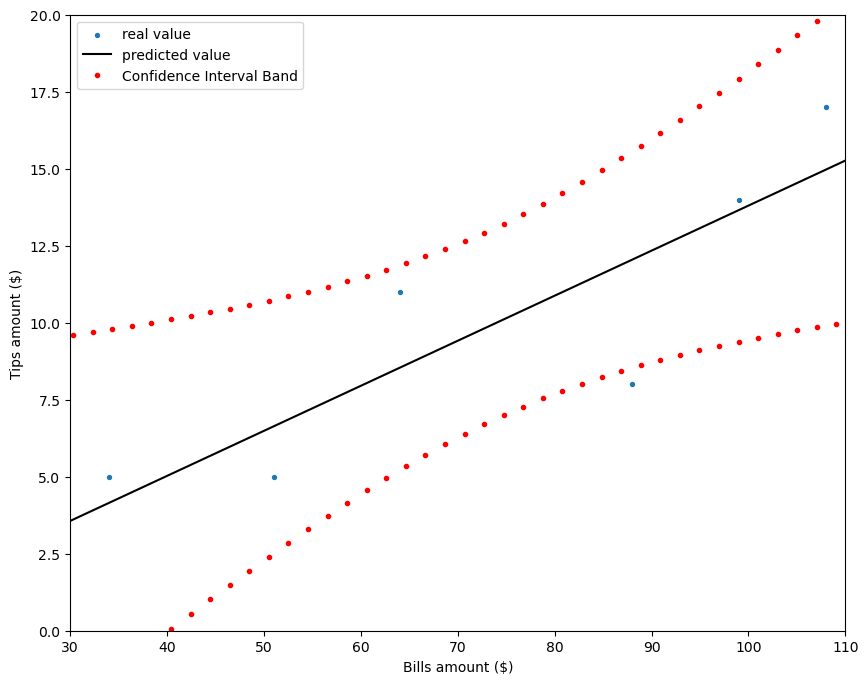

In [275]:
# plot linear regression
# plot confidence interval band for 95% confidence level
# the red dot represent the confidence interval band that is the possible mean of value of ŷ

plt.figure(figsize = (10,8))
plt.scatter(x,y, s = 8, label = "real value")
plt.plot(x_, predicted_value, color = "black", label = "predicted value")
plt.plot(x_, upper_confidence_level , ".",color = "red", label = "Confidence Interval Band")
plt.plot(x_, lower_confidence_level , ".",color = "red")
plt.xlabel("Bills amount ($)")
plt.ylabel("Tips amount ($)")
ax = plt.gca()
ax.set_xlim([30,110])
ax.set_ylim([0,20])
plt.legend()

In [281]:
s_pred

2.9917562803160727

In [285]:
# standard deviation for prediction interval based on prediction value of y*

s = model.scale ** 0.5
i = 64
sy = s * ((1 / len(x)) + (((i - np.mean(x)) ** 2) / square )) ** 0.5

s_squared = model.scale
s_pred = s_squared + sy**2
s_pred = s_pred ** 0.5

# prediction interval

x_ = np.linspace(0,200,100)
predicted_value = []
for i in x_:
    predicted_value.append(model.params.bills * i + model.params.const)

index = np.arange(0,100)
upper_prediction_level = []
for i in index:
    upper_prediction_level.append(predicted_value[i] + t_value * s_pred)
    
lower_prediction_level = []
for i in index:
    lower_prediction_level.append(predicted_value[i] - t_value * s_pred)

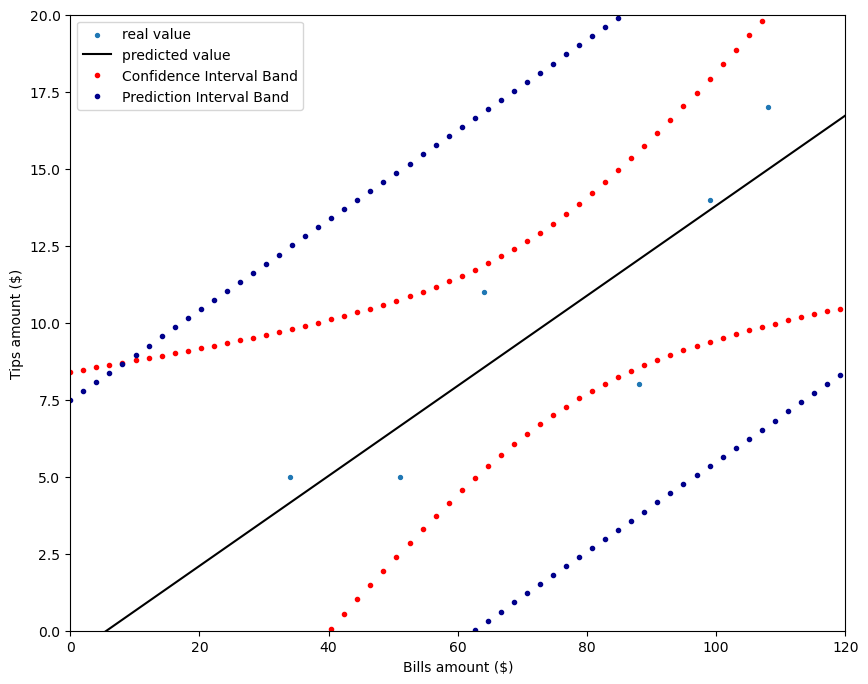

In [286]:
# plot linear regression
# plot confidence interval band for 95% confidence level
# the red dot represent the confidence interval band that is the possible range of mean of value of ŷ 
# the blue dot represent the prediction interval band that is the possible range of individual value ŷ 

plt.figure(figsize = (10,8))
plt.scatter(x,y, s = 8, label = "real value")
plt.plot(x_, predicted_value, color = "black", label = "predicted value")
plt.plot(x_, upper_confidence_level , ".",color = "red", label = "Confidence Interval Band")
plt.plot(x_, lower_confidence_level , ".",color = "red")
plt.plot(x_, upper_prediction_level, ".", color = "darkblue", label = "Prediction Interval Band")
plt.plot(x_, lower_prediction_level, ".", color = "darkblue")
plt.xlabel("Bills amount ($)")
plt.ylabel("Tips amount ($)")
ax = plt.gca()
ax.set_xlim([0,120])
ax.set_ylim([0,20])
plt.legend()

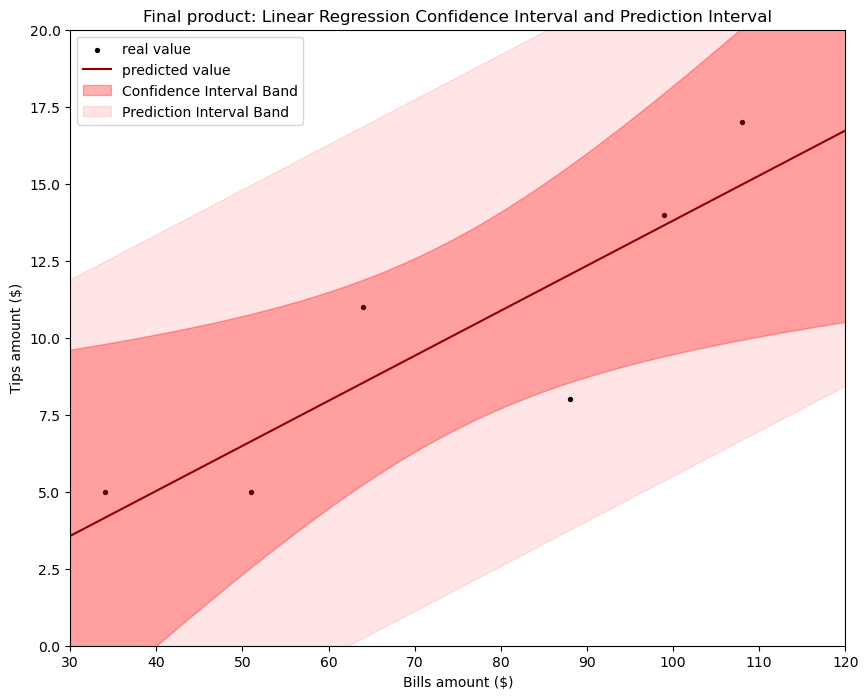

In [291]:
# plot linear regression
# plot confidence interval band for 95% confidence level

plt.figure(figsize = (10,8))
plt.scatter(x,y, s = 8,color = 'black', label = "real value")
plt.plot(x_, predicted_value, color = "darkred", label = "predicted value")
plt.fill_between(x_, (upper_confidence_level), (lower_confidence_level), color = "red", alpha = 0.3,  label = "Confidence Interval Band")
plt.fill_between(x_, (upper_prediction_level), (lower_prediction_level), color = "red", alpha = 0.1, label = "Prediction Interval Band")
plt.xlabel("Bills amount ($)")
plt.ylabel("Tips amount ($)")
plt.title("Final product: Linear Regression Confidence Interval and Prediction Interval")
ax = plt.gca()
ax.set_xlim([30,120])
ax.set_ylim([0,20])
plt.legend()